<a href="https://colab.research.google.com/github/HemavathiS22/BigMart/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
path='/content/apps.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [ ]:
df.shape

(9659, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [ ]:
df['App'].nunique()

9659

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df['Category'].nunique()

33

In [ ]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df["Size"].nunique()

460

In [ ]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
df['Rating'].nunique()

39

In [ ]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
len(df["Content Rating"].unique())

6

In [ ]:
df.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


<Axes: >

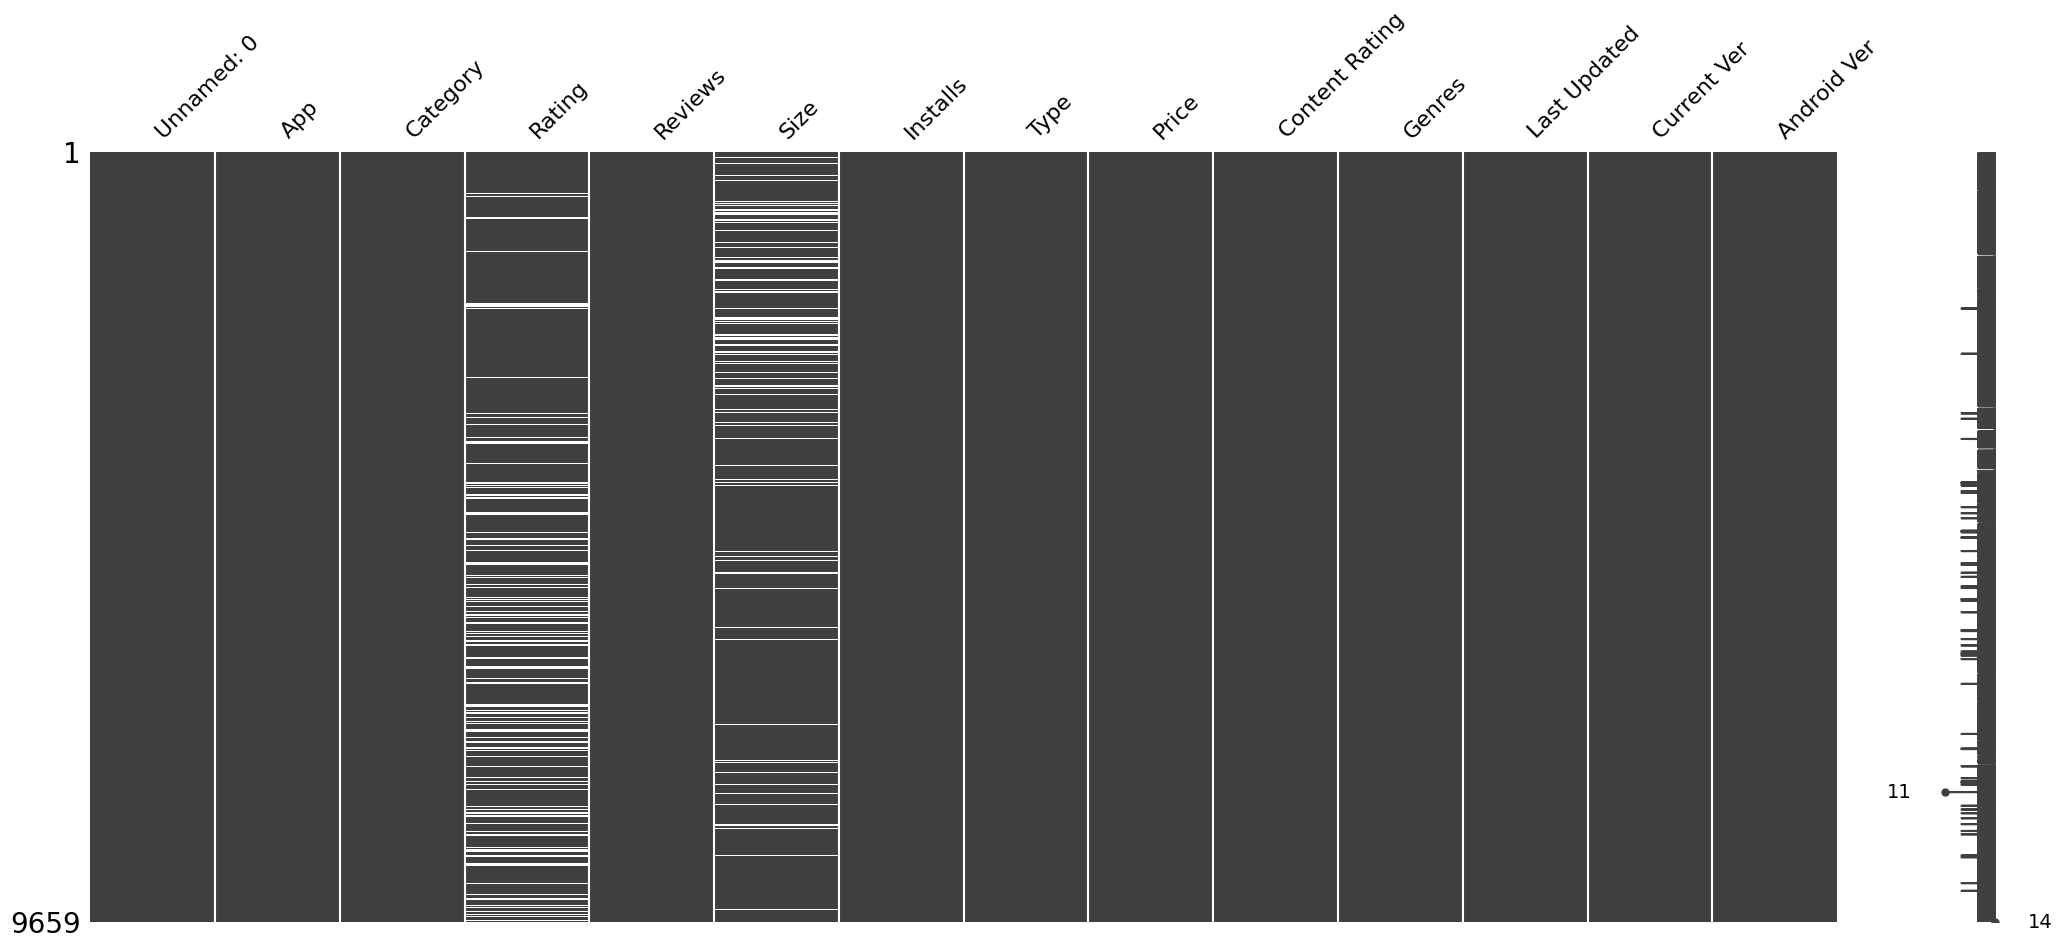

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
len(df.isnull().sum())

14

In [ ]:
df=df.dropna()

<Axes: >

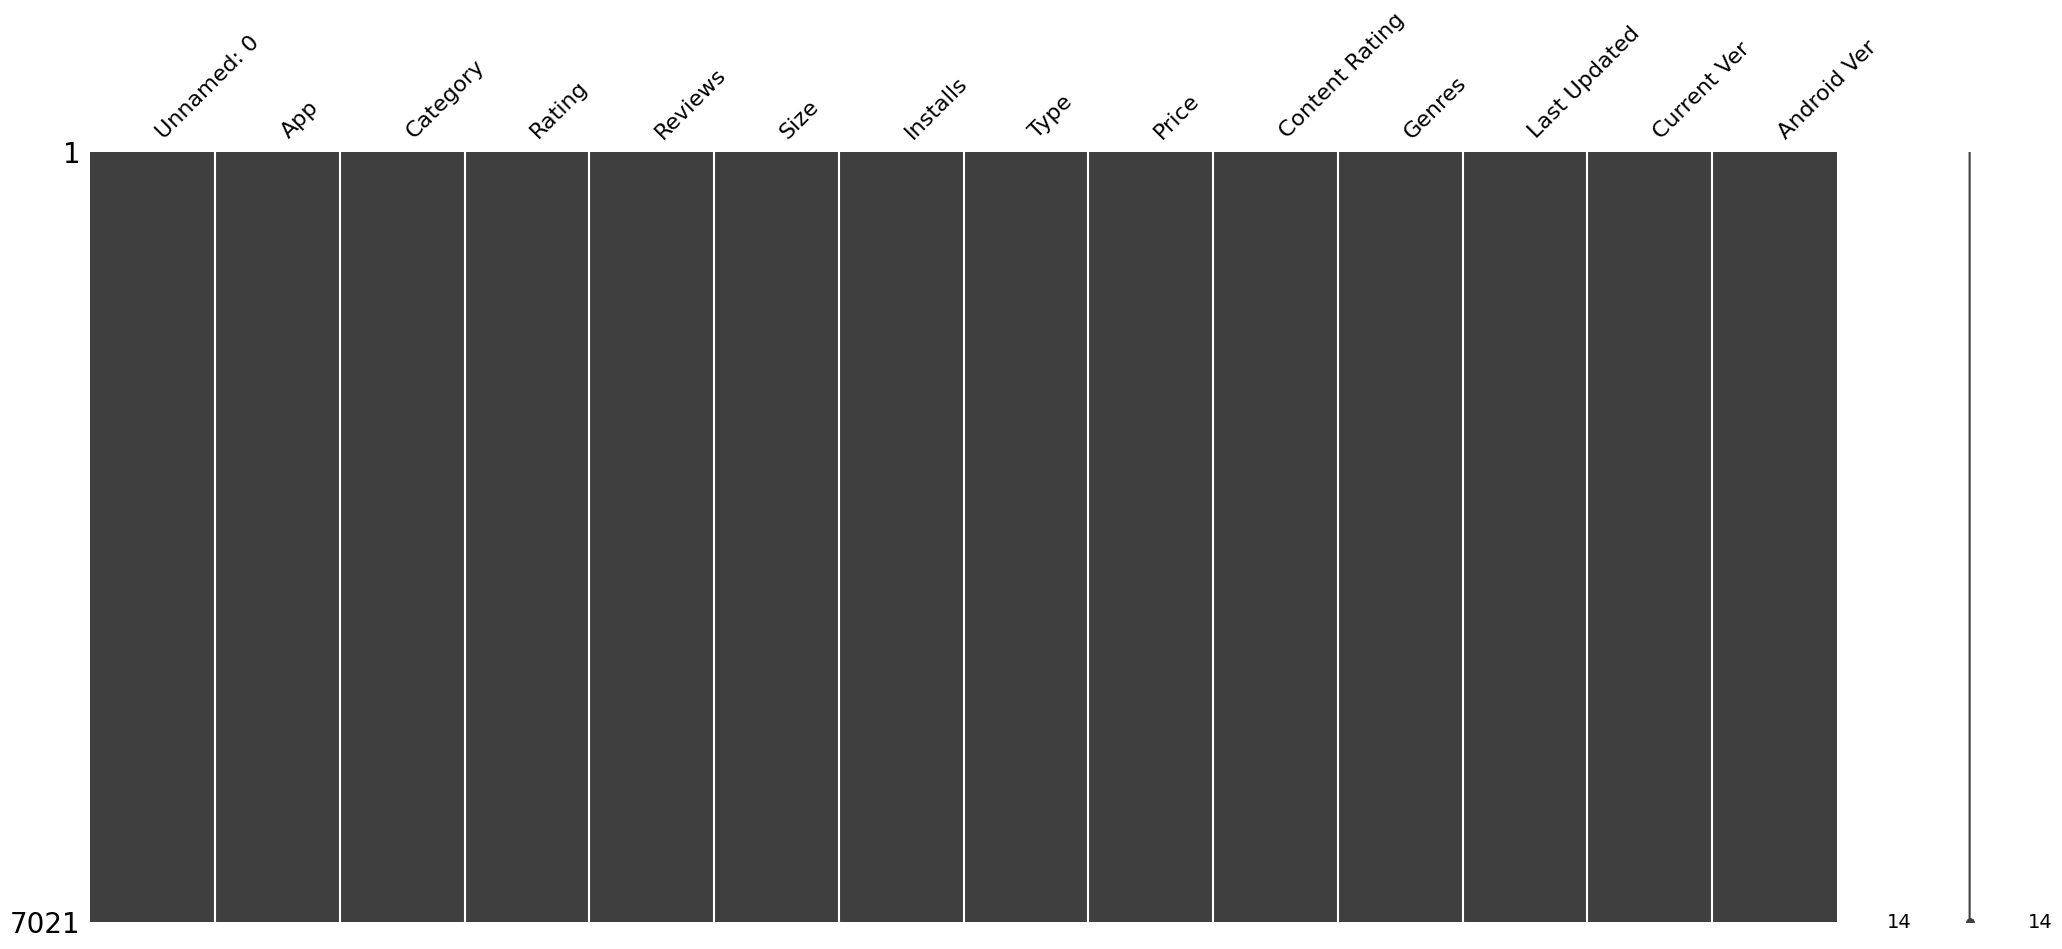

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().any()

Unnamed: 0        False
App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [ ]:
df.shape

(7021, 14)

In [ ]:
df.App.nunique()

7021

In [ ]:
len(df['App'])

7021

In [ ]:
id=np.arange(7021)
df['id']=id

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,id
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [ ]:
df=df.set_index('id')

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
id,,,,,,,,,,,,,,
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df["Type"].value_counts()

Free    6482
Paid     539
Name: Type, dtype: int64

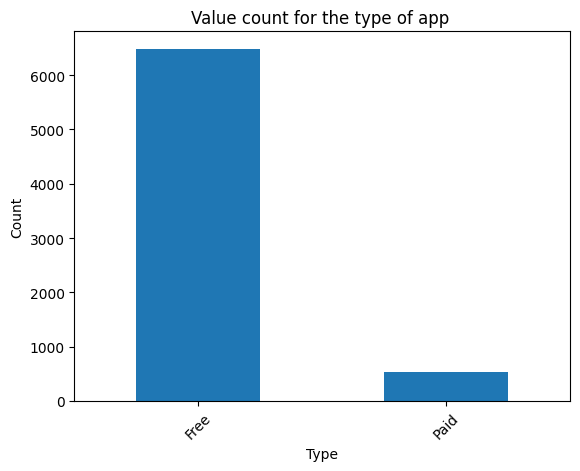

In [ ]:
df["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation=45)

plt.show()

In [ ]:
df.describe()

,Unnamed: 0,Rating,Reviews
count,7021.000000,7021.000000,7.021000e+03
mean,5638.433984,4.160704,1.448960e+05
std,3079.108366,0.559241,1.024428e+06
min,0.000000,1.000000,1.000000e+00
25%,3087.000000,4.000000,8.400000e+01
50%,5716.000000,4.300000,1.546000e+03
75%,8292.000000,4.500000,2.658700e+04
max,10840.000000,5.000000,4.489172e+07


In [ ]:
df.Reviews= df.Reviews.astype(float)

In [ ]:
df.describe()

,Unnamed: 0,Rating,Reviews
count,7021.000000,7021.000000,7.021000e+03
mean,5638.433984,4.160704,1.448960e+05
std,3079.108366,0.559241,1.024428e+06
min,0.000000,1.000000,1.000000e+00
25%,3087.000000,4.000000,8.400000e+01
50%,5716.000000,4.300000,1.546000e+03
75%,8292.000000,4.500000,2.658700e+04
max,10840.000000,5.000000,4.489172e+07


In [ ]:

df.Installs= df["Installs"].str.replace("+", "")

In [ ]:
df.Installs= df["Installs"].str.replace(",", "")

In [ ]:
df["Installs"] = pd.to_numeric(df["Installs"])

In [ ]:
df["Price"]= df["Price"].str.replace("$", "")

In [ ]:
df["Price"]= df.Price.astype(float)

In [ ]:
df.describe()

,Unnamed: 0,Rating,Reviews,Installs,Price
count,7021.000000,7021.000000,7.021000e+03,7.021000e+03,7021.000000
mean,5638.433984,4.160704,1.448960e+05,4.471804e+06,1.174222
std,3079.108366,0.559241,1.024428e+06,2.714908e+07,18.205355
min,0.000000,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,3087.000000,4.000000,8.400000e+01,1.000000e+04,0.000000
50%,5716.000000,4.300000,1.546000e+03,1.000000e+05,0.000000
75%,8292.000000,4.500000,2.658700e+04,1.000000e+06,0.000000
max,10840.000000,5.000000,4.489172e+07,1.000000e+09,400.000000


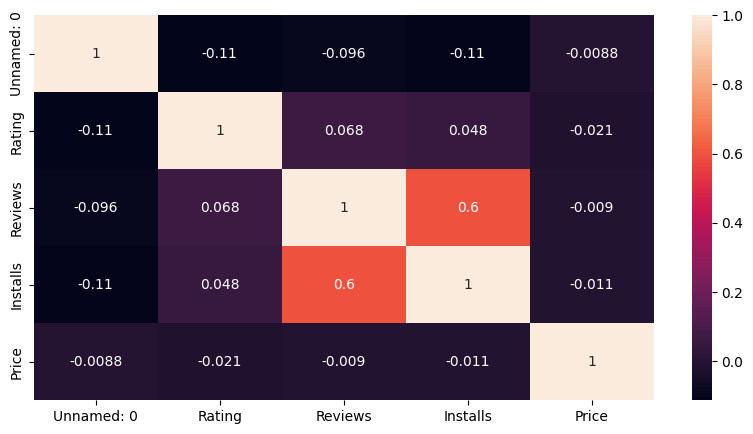

In [ ]:
plt.figure(figsize=(10,5))
corr= df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M', '56M',
       '57M', '35M', '54M', '0.201', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '0.023', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M',
       '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '0.079', '8.4M',
       '3.7M', '0.118', '44M', '0.695', '1.6M', '6.2M', '53M', '1.4M',
       '3.0M', '7.2M'

In [ ]:
df.Size= df["Size"].str.replace("M", "")
df.Size= df['Size'].str.replace("Varies with device","-1")

In [ ]:
df['Size']=df['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)

In [ ]:
df.Size.unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '23',
       '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', '9.4', '15', '10',
       '1.2', '26', '8.0', '7.9', '56', '57', '35', '54', '0.201', '3.6',
       '5.7', '8.6', '2.4', '27', '2.7', '2.5', '7.0', '16', '3.4', '8.9',
       '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5', '9.8',
       '52', '9.0', '6.7', '30', '2.6', '7.1', '22', '6.4', '3.2', '8.2',
       '4.9', '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3',
       '2.1', '42', '9.1', '55', '0.023', '7.3', '6.5', '1.5', '7.5',
       '51', '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40',
       '7.8', '8.8', '6.6', '5.1', '61', '66', '0.079', '8.4', '3.7',
       '0.118', '44', '0.695', '1.6', '6.2', '53', '1.4', '3.0', '7.2',
       '5.8', '3.8', '9.6', '45', '63', '49', '77', '4.4', '70', '9.3',
       '8.1', '36', '6.9', '7.4', '84', '97', '2.0', '1.9',

In [ ]:
df.drop(['Genres','Last Updated','Current Ver',"Android Ver"],axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19,10000,Free,0.0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14,500000,Free,0.0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25,50000000,Free,0.0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone


In [ ]:
rating_most=df.Rating.value_counts()

In [ ]:
df.Rating.value_counts()

4.4    722
4.3    719
4.5    689
4.2    671
4.6    563
4.1    534
4.0    448
4.7    390
3.9    312
5.0    266
3.8    257
4.8    205
3.7    191
3.6    152
3.5    147
3.4    113
3.3     96
4.9     84
3.0     72
3.1     62
3.2     58
2.9     43
2.8     40
2.6     23
2.7     21
2.3     20
2.4     19
2.5     18
1.0     16
2.2     14
2.0     11
1.9     10
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

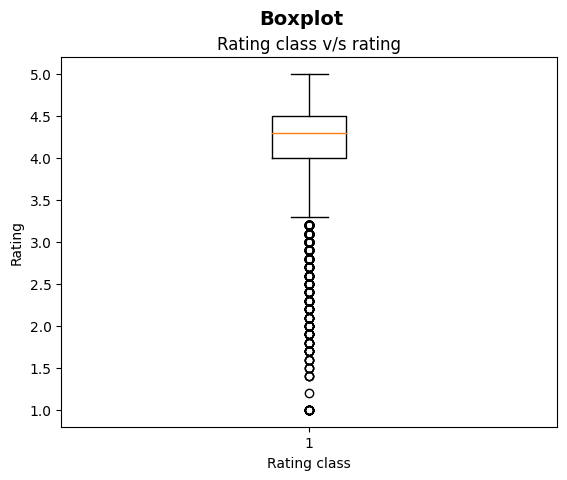

In [ ]:
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(df['Rating'])
ax.set_title('Rating class v/s rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')

plt.show()

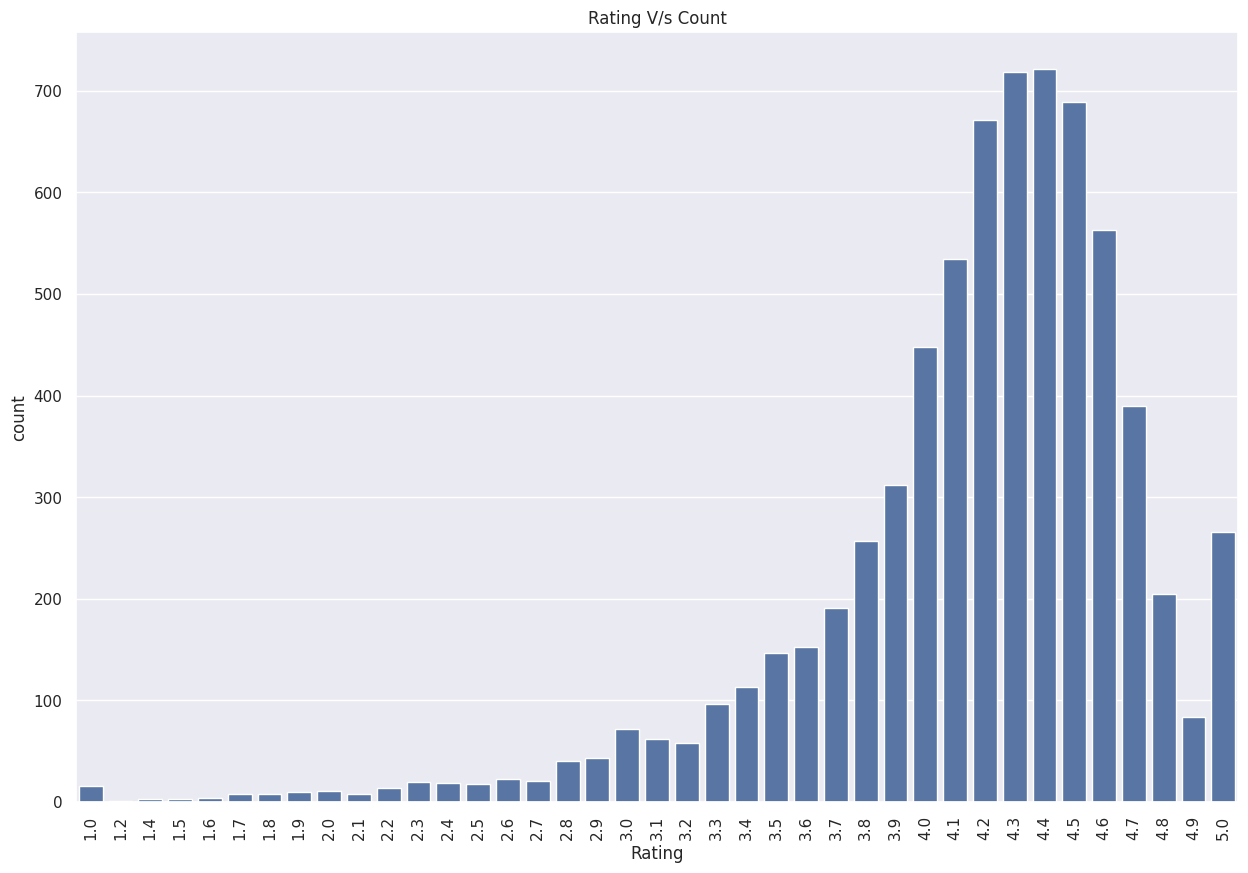

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
#dat = sns.load_dataset("df")
plt.xticks(rotation=90)
plt.title("Rating V/s Count")
ax = sns.countplot(x="Rating", data=df)

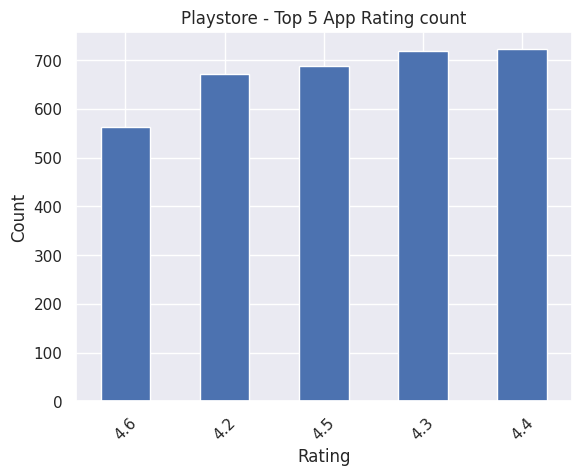

In [ ]:
df["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar()
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)

plt.show()

In [ ]:
app_rating1=df[df['Rating'] >= 4]
app_rating2=df[(df['Rating'] < 4) & (df['Rating'] > 3 )]
app_rating3= df[df['Rating'] <=3]

In [ ]:
app_rating1.shape,app_rating2.shape,app_rating3.shape

((5291, 10), (1388, 10), (342, 10))

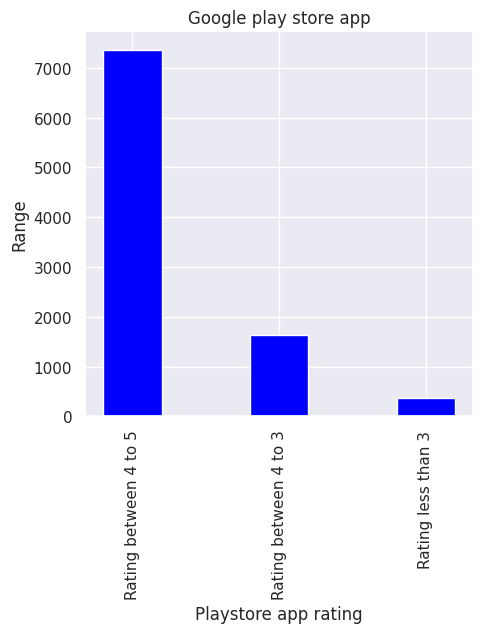

In [ ]:
data = {'Rating between 4 to 5':7363, 'Rating between 4 to 3':1627, 'Rating less than 3':370,
		}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
		width =0.4)

plt.xlabel("Playstore app rating")
plt.ylabel("Range")
plt.title("Google play store app")
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

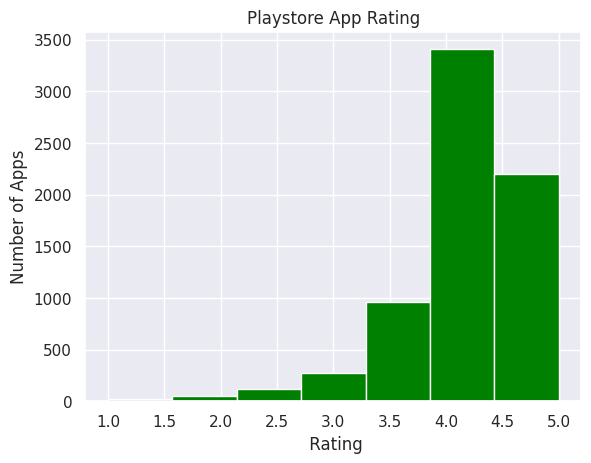

In [ ]:
app_rating= df["Rating"]
num_bins=7
plt.hist(app_rating, num_bins, facecolor="green", alpha = 1)
plt.title('Playstore App Rating')
plt.xlabel(" Rating")
plt.ylabel("Number of Apps")
plt.show

In [ ]:
df1=df[df['Rating']==5]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 224 to 7019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      266 non-null    int64  
 1   App             266 non-null    object 
 2   Category        266 non-null    object 
 3   Rating          266 non-null    float64
 4   Reviews         266 non-null    float64
 5   Size            266 non-null    object 
 6   Installs        266 non-null    int64  
 7   Type            266 non-null    object 
 8   Price           266 non-null    float64
 9   Content Rating  266 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 22.9+ KB


In [ ]:
df1=df1.sort_values(by=['Installs','Reviews'], ascending=False)
df1

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
6147,9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10.0,3.0,10000,Free,0.00,Everyone
5117,8058,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000,Free,0.00,Everyone
5243,8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34.0,12,5000,Free,0.00,Everyone
4683,7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24.0,3.2,5000,Free,0.00,Everyone
6713,10357,Ríos de Fe,LIFESTYLE,5.0,141.0,15,1000,Free,0.00,Everyone
...,...,...,...,...,...,...,...,...,...,...
1440,2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1.0,4.6,5,Free,0.00,Everyone
5933,9218,EB Cash Collections,BUSINESS,5.0,1.0,4.3,5,Free,0.00,Everyone
1436,2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25,1,Free,0.00,Everyone


In [ ]:
df1.Category.value_counts(ascending=False)

FAMILY                 65
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
SHOPPING                6
DATING                  6
PHOTOGRAPHY             6
NEWS_AND_MAGAZINES      6
BOOKS_AND_REFERENCE     5
EVENTS                  5
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
LIBRARIES_AND_DEMO      2
COMICS                  2
FOOD_AND_DRINK          2
ART_AND_DESIGN          1
PARENTING               1
Name: Category, dtype: int64

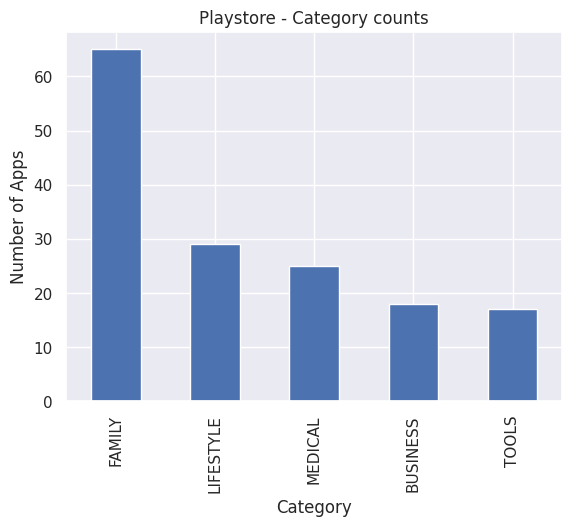

In [ ]:
df1.Category.value_counts(ascending=False).nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts")
plt.show()

In [ ]:
df["Category"].value_counts().nlargest(5).sort_values(ascending=False)

FAMILY             1511
GAME                832
TOOLS               625
PERSONALIZATION     274
LIFESTYLE           269
Name: Category, dtype: int64

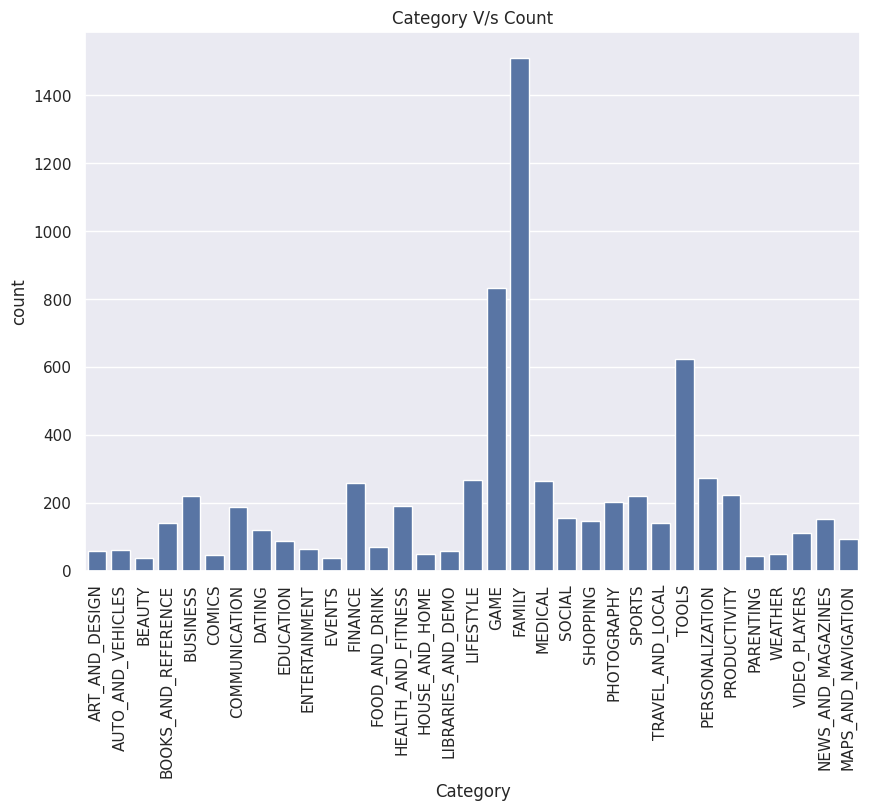

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
#dat = sns.load_dataset("df")
plt.xticks(rotation=90)
plt.title("Category V/s Count")
ax = sns.countplot(x="Category", data=df)

In [ ]:
df.groupby("Category").Installs.agg(["min", "mean", "median", "max"])

,min,mean,median,max
Category,,,,
ART_AND_DESIGN,100,1.710829e+06,100000.0,50000000
AUTO_AND_VEHICLES,100,6.947587e+05,100000.0,10000000
BEAUTY,100,3.626000e+05,50000.0,5000000
BOOKS_AND_REFERENCE,5,8.140720e+05,50000.0,10000000
BUSINESS,5,1.740013e+06,10000.0,100000000
COMICS,100,3.708745e+05,100000.0,5000000
COMMUNICATION,10,9.669763e+06,100000.0,500000000
DATING,10,6.933804e+05,100000.0,10000000
EDUCATION,1000,1.786386e+06,1000000.0,10000000


In [ ]:

df.sort_values(by="Installs", ascending= False).head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
2115,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone
1973,3473,Dropbox,PRODUCTIVITY,4.4,1861310.0,61,500000000,Free,0.0,Everyone
233,347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11,500000000,Free,0.0,Everyone


In [ ]:
top_installed_apps=df.sort_values(by="Installs", ascending= False)

In [ ]:
top_installed_apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
2115,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone
1973,3473,Dropbox,PRODUCTIVITY,4.4,1861310.0,61,500000000,Free,0.0,Everyone
233,347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11,500000000,Free,0.0,Everyone


In [ ]:
len(df[df["Installs"]>= 1000000000])

2

In [ ]:
top_installed_and_rated_apps = df.sort_values(by=["Installs", "Rating"], ascending=False)
top_installed_and_rated_apps.head() # main top apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
2115,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
1827,3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693.0,17,500000000,Free,0.0,Everyone
247,378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40,500000000,Free,0.0,Teen
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone


In [ ]:
top_installed_and_reviewed_apps = df.sort_values(by=["Installs", "Reviews"], ascending=False)
top_installed_and_reviewed_apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
2115,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone
247,378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40,500000000,Free,0.0,Teen
967,1662,Pou,GAME,4.3,10485308.0,24,500000000,Free,0.0,Everyone


In [ ]:
top_10_installed_and_rated_apps= top_installed_and_rated_apps.head(10)

In [ ]:
top_10_installed_and_rated_apps.Category.sort_values(ascending=False)


id
1827                 TOOLS
1973          PRODUCTIVITY
2115    NEWS_AND_MAGAZINES
3419    HEALTH_AND_FITNESS
960                   GAME
961                   GAME
966                   GAME
967                   GAME
247          COMMUNICATION
233          COMMUNICATION
Name: Category, dtype: object

In [ ]:
df["App"].nunique()

7021

In [ ]:
top_10_installed_and_rated_apps["Content Rating"].sort_values(ascending=False)

id
2115            Teen
247             Teen
960     Everyone 10+
1827        Everyone
961         Everyone
1973        Everyone
233         Everyone
966         Everyone
967         Everyone
3419        Everyone
Name: Content Rating, dtype: object

In [ ]:
df["Content Rating"].nunique()

6

In [ ]:
count_Teen=0
count_Everyone_10 = 0
count_Everyone=0

count_Mature_17=0
count_Adults_only_18=0
count_Unrated=0


for x in df["Content Rating"]:
    if x== "Teen":
        count_Teen= count_Teen+1
    elif x== "Everyone 10+":
        count_Everyone_10= count_Everyone_10+1
    elif x== "Everyone":
        count_Everyone= count_Everyone+1
    elif x== "Mature 17+":
        count_Mature_17 = count_Mature_17+1
    elif x== "Adults only 18+":
        count_Adults_only_18= count_Adults_only_18+1
    elif x== "Unrated":
        count_Unrated= count_Unrated+1
print ("Number of apps of all the dataset, having the content rating which belong the top apps:\n")
print ("Number of apps that belong to the content rating \"Teen\" is: {}\n".format(count_Teen))
print ("Number of apps that belong to the content rating \"Everyone 10+\" is: {}\n".format(count_Everyone_10))
print ("Number of apps that belong to the content rating \"Everyone\" is: {}\n".format(count_Everyone))
print ("Number of apps having content rating not included in the top apps\n")
print ("Number of apps that belong to the content rating \"Mature 17+\" is: {}".format(count_Mature_17))
print ("Number of apps that belong to the content rating \"Adults only 18+\" is: {}".format(count_Adults_only_18))
print ("Number of apps that belong to the content rating \"Unrated\" is: {}".format(count_Unrated))

Number of apps of all the dataset, having the content rating which belong the top apps:

Number of apps that belong to the content rating "Teen" is: 779

Number of apps that belong to the content rating "Everyone 10+" is: 259

Number of apps that belong to the content rating "Everyone" is: 5676

Number of apps having content rating not included in the top apps

Number of apps that belong to the content rating "Mature 17+" is: 304
Number of apps that belong to the content rating "Adults only 18+" is: 2
Number of apps that belong to the content rating "Unrated" is: 1


In [ ]:
df["Content Rating"].value_counts(ascending=False)

Everyone           5676
Teen                779
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

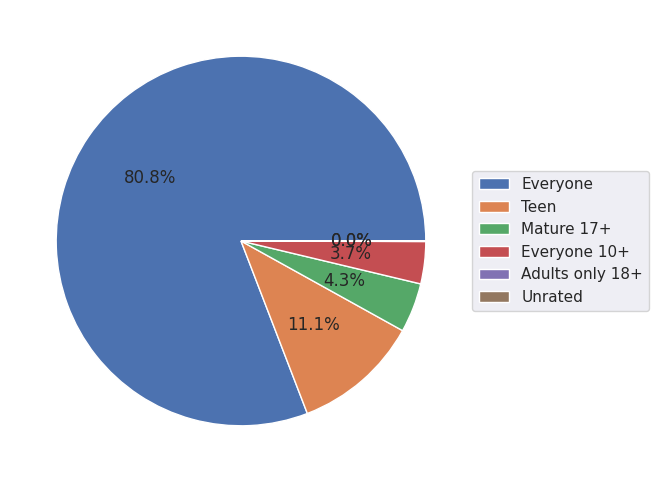

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Content Rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

In [ ]:
top_10_installed_and_rated_apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
2115,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
1827,3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693.0,17,500000000,Free,0.0,Everyone
247,378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40,500000000,Free,0.0,Teen
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone
1973,3473,Dropbox,PRODUCTIVITY,4.4,1861310.0,61,500000000,Free,0.0,Everyone
233,347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11,500000000,Free,0.0,Everyone
966,1661,Temple Run 2,GAME,4.3,8118609.0,62,500000000,Free,0.0,Everyone
967,1662,Pou,GAME,4.3,10485308.0,24,500000000,Free,0.0,Everyone


In [ ]:
df.sort_values(by="Rating", ascending= False).head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
1435,2452,Galaxies of Hope,MEDICAL,5.0,2.0,24,50,Free,0.0,Everyone
5120,8063,cx advance call blocker,PERSONALIZATION,5.0,3.0,3.4,50,Free,0.0,Everyone
6912,10659,FN,BUSINESS,5.0,14.0,3.3,50,Free,0.0,Everyone
4833,7698,CP Trivia,GAME,5.0,5.0,12,100,Free,0.0,Everyone
4832,7697,CP Installer App,BUSINESS,5.0,4.0,24,100,Free,0.0,Everyone


In [ ]:
df.sort_values(by="Reviews", ascending= False).head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
975,1670,Clash of Clans,GAME,4.6,44891723.0,98,100000000,Free,0.0,Everyone 10+
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
965,1660,Clash Royale,GAME,4.6,23133508.0,97,100000000,Free,0.0,Everyone 10+
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone
247,378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40,500000000,Free,0.0,Teen


In [ ]:
top_10_installed_and_rated_apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,,
960,1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
2115,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
1827,3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693.0,17,500000000,Free,0.0,Everyone
247,378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40,500000000,Free,0.0,Teen
961,1655,Candy Crush Saga,GAME,4.4,22426677.0,74,500000000,Free,0.0,Everyone
1973,3473,Dropbox,PRODUCTIVITY,4.4,1861310.0,61,500000000,Free,0.0,Everyone
233,347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11,500000000,Free,0.0,Everyone
966,1661,Temple Run 2,GAME,4.3,8118609.0,62,500000000,Free,0.0,Everyone
967,1662,Pou,GAME,4.3,10485308.0,24,500000000,Free,0.0,Everyone


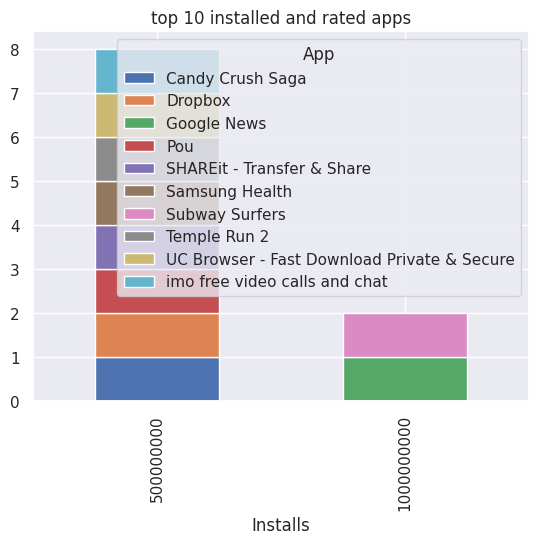

In [ ]:
app4= top_10_installed_and_rated_apps
top_apps=app4.groupby(["Installs", "App"]).size().unstack()
top_apps.plot(kind="bar",stacked=True)
plt.title('top 10 installed and rated apps')
ax=plt.gca()
plt.show()

In [ ]:
df["Price"].value_counts().sort_values(ascending=False).head(10)

0.00    6482
0.99     102
2.99      97
4.99      61
1.99      53
3.99      40
1.49      27
2.49      16
9.99      14
5.99      11
Name: Price, dtype: int64

In [ ]:
df.Price.nunique()

68

In [ ]:
df.Type.value_counts()

Free    6482
Paid     539
Name: Type, dtype: int64

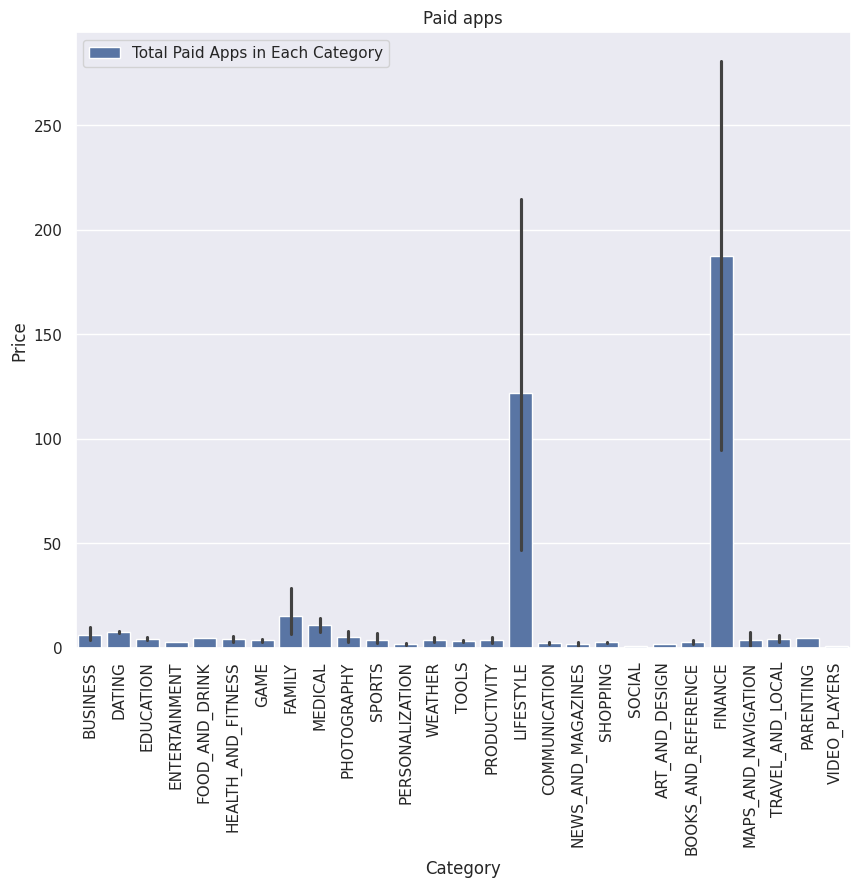

In [ ]:
paid_apps = df[df["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=paid_apps,
            label="Total Paid Apps in Each Category")
plt.title("Paid apps")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Here we look for the top five prices and the number of apps
df["Price"].value_counts().nlargest(5).sort_values(ascending=False)

0.00    6482
0.99     102
2.99      97
4.99      61
1.99      53
Name: Price, dtype: int64

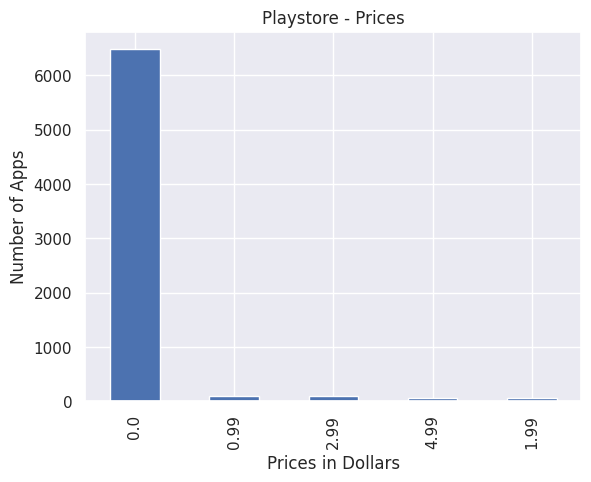

In [ ]:
df["Price"].value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Prices in Dollars")
plt.title("Playstore - Prices")
plt.show()

(-1.0999999999999988,
 1.0999999999999999,
 -1.099999985116025,
 1.0999996876697973)

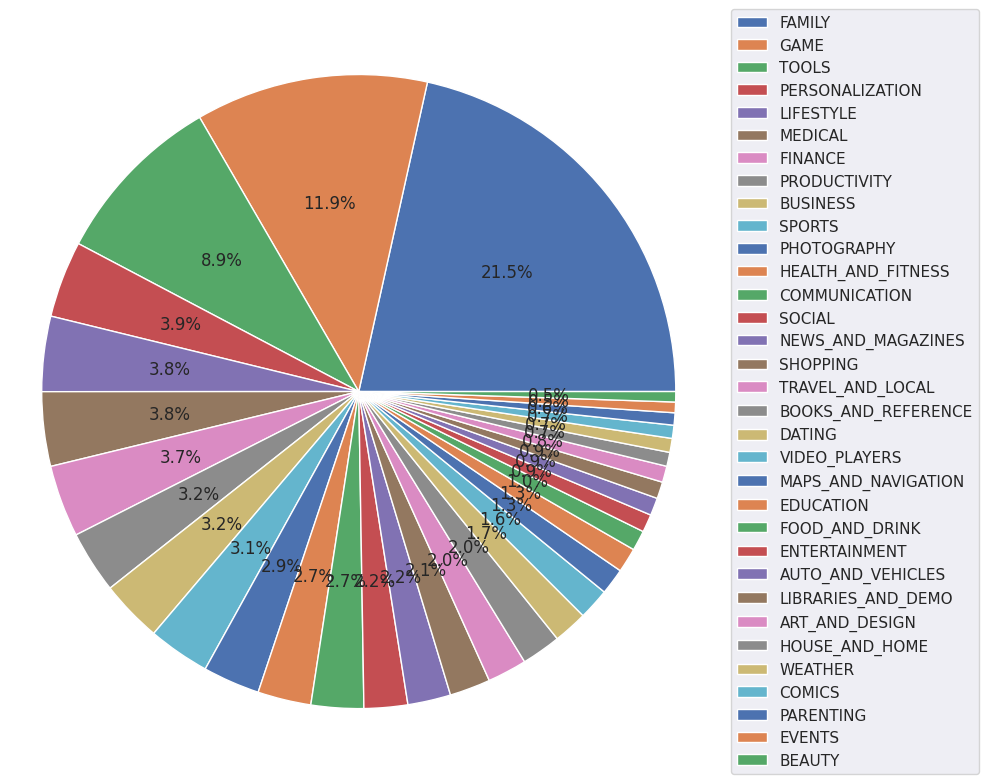

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

In [ ]:
top_installed_and_rated_apps["Category"].head(100).value_counts()

GAME                  52
TOOLS                 10
COMMUNICATION          6
PHOTOGRAPHY            6
FAMILY                 5
PRODUCTIVITY           4
PERSONALIZATION        4
VIDEO_PLAYERS          2
SHOPPING               2
SOCIAL                 2
BUSINESS               2
ENTERTAINMENT          2
NEWS_AND_MAGAZINES     1
HEALTH_AND_FITNESS     1
SPORTS                 1
Name: Category, dtype: int64

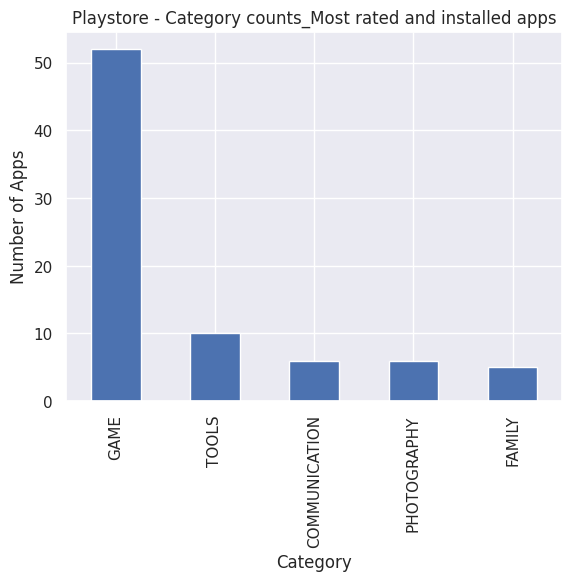

In [ ]:
top_installed_and_rated_apps["Category"].head(100).value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts_Most rated and installed apps")
plt.show()

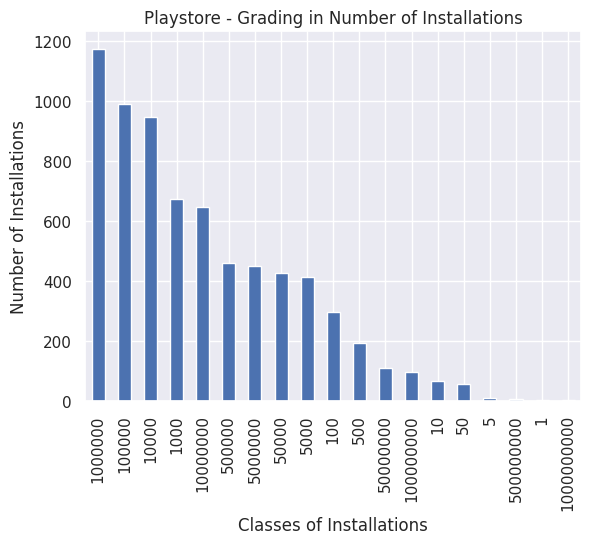

In [ ]:
df["Installs"].value_counts().plot.bar()
plt.ylabel("Number of Installations")
plt.xlabel("Classes of Installations")
plt.title("Playstore - Grading in Number of Installations")
plt.show()

In [ ]:

df["Installs"].value_counts().nlargest(5)

1000000     1174
100000       989
10000        947
1000         673
10000000     646
Name: Installs, dtype: int64

In [ ]:
df["Content Rating"].value_counts()

Everyone           5676
Teen                779
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

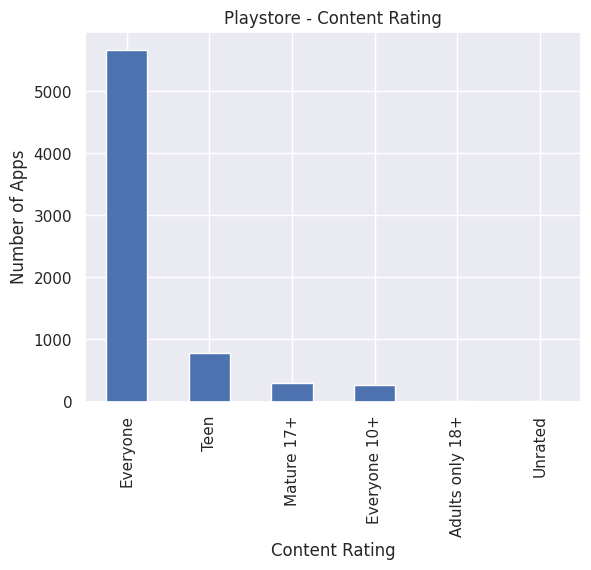

In [ ]:
df["Content Rating"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Content Rating")
plt.title("Playstore - Content Rating")
plt.show()

In [ ]:
top_installed_and_rated_apps["Content Rating"].head(100).value_counts()

Everyone        72
Teen            16
Everyone 10+    10
Mature 17+       2
Name: Content Rating, dtype: int64

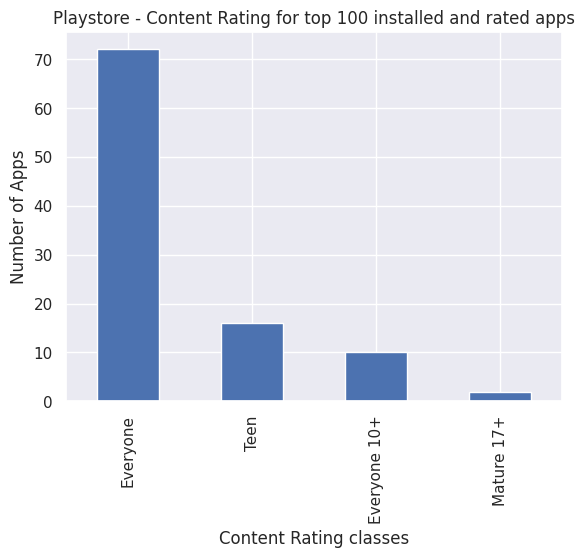

In [ ]:
top_installed_and_rated_apps["Content Rating"].head(100).value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Content Rating classes")
plt.title("Playstore - Content Rating for top 100 installed and rated apps")
plt.show()

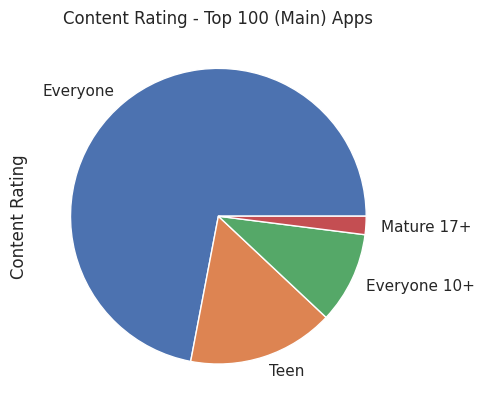

In [ ]:
app1=top_installed_and_rated_apps.head(100)
app1["Content Rating"].value_counts().plot.pie()
plt.title("Content Rating - Top 100 (Main) Apps")
plt.show()

In [ ]:
top_installed_and_rated_apps.head(100).Installs.value_counts(ascending=False)

100000000     90
500000000      8
1000000000     2
Name: Installs, dtype: int64

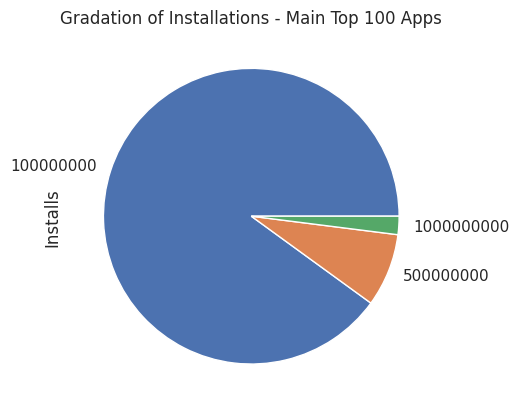

In [ ]:
app2= top_installed_and_rated_apps.head(100)
app2["Installs"].value_counts().plot.pie()
plt.title("Gradation of Installations - Main Top 100 Apps")
plt.show()

In [ ]:
path1='/content/user_reviews.csv'

In [ ]:
# Read files using pandas modules
user_dat=pd.read_csv(path1)

In [ ]:
user_dat.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_dat.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_dat.App.nunique()

1074

In [ ]:
user_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user=user_dat.dropna()

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
user.App.nunique()

865

In [ ]:
user.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
user.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

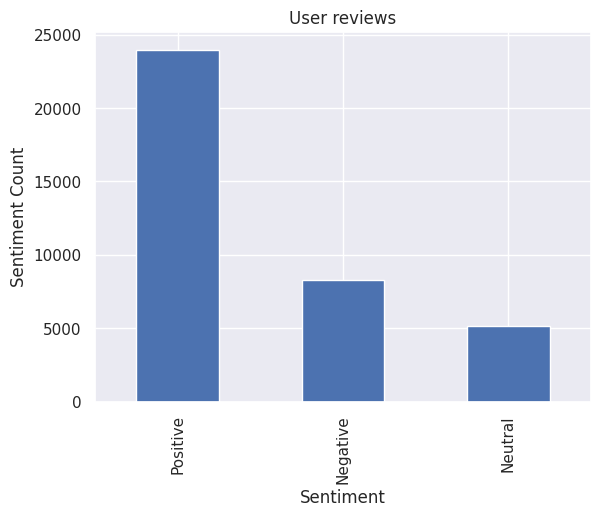

In [ ]:
user["Sentiment"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Sentiment Count")
plt.xlabel("Sentiment")
plt.title("User reviews")
plt.show()

In [ ]:
data=user.groupby("App")
data.mean()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964


In [ ]:
data.max()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,nice super get,Positive,1.000000,1.00
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.910000,1.00
11st,good good,Positive,1.000000,1.00
1800 Contacts - Lens Store,great,Positive,0.838542,1.00
1LINE – One Line with One Touch,yoko,Positive,1.000000,1.00
...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,would actually load anything. I tried uninstal...,Positive,0.700000,0.95
Hotspot Shield Free VPN Proxy & Wi-Fi Security,നോട naffgggg,Positive,1.000000,1.00
Hotstar,running,Positive,1.000000,1.00


In [ ]:
data.min()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,10 best foods 4u Excellent chose foods,Negative,-0.800000,0.0
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,104 job hunt So amazing.. easy use.. thanx guys,Negative,-0.112500,0.0
11st,0 points I want to give No -10000000000000 poi...,Negative,-1.000000,0.0
1800 Contacts - Lens Store,Contacts shipped time efficient.,Negative,-0.300000,0.0
1LINE – One Line with One Touch,Cool,Negative,-0.825000,0.0
...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,"Always able get room, matter time frame locati...",Negative,-0.988281,0.0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial 8000 year charges,Negative,-0.700000,0.0
Hotstar,2 issues. 1st subtitles get downloading videos...,Negative,-0.555556,0.0


In [ ]:
df1=data.mean().sort_values(by=["Sentiment_Polarity","Sentiment_Subjectivity"],ascending=[False,False])

In [ ]:
top_positively_user_reviewed_apps=df1.head()
top_positively_user_reviewed_apps

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
HomeWork,1.000000,0.300000
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Bed Time Fan - White Noise Sleep Sounds,0.781250,0.600000
Cameringo Lite. Filters Camera,0.770269,0.533333


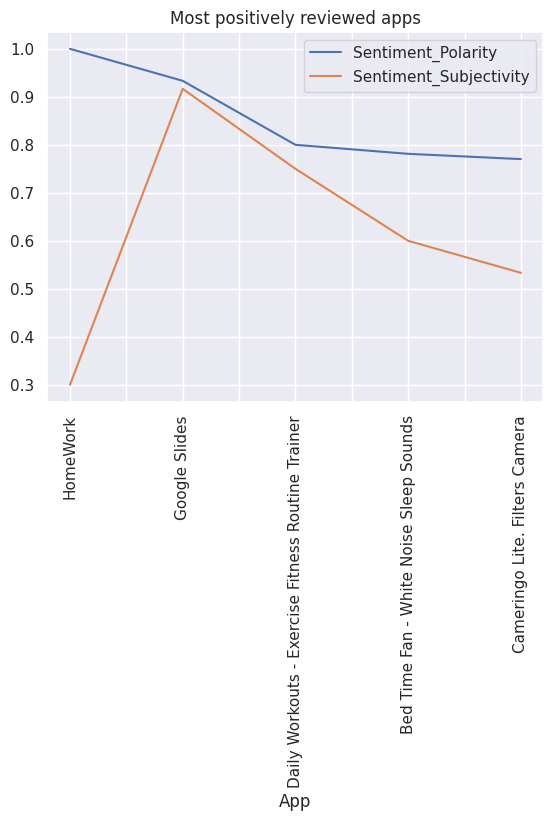

In [ ]:
top_positively_user_reviewed_apps.plot()
plt.xticks(rotation=90)
plt.title("Most positively reviewed apps")
plt.show()

In [ ]:
most_negatively_reviewed_apps=df1.tail()
most_negatively_reviewed_apps

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Call of Duty:Black Ops Zombies,-0.162120,0.442716
Fruit Block - Puzzle Legend,-0.183333,0.377778
DEER HUNTER 2018,-0.383333,0.433333
Google Street View,-0.500000,0.691667
Draw Your Game,-0.668490,0.683333


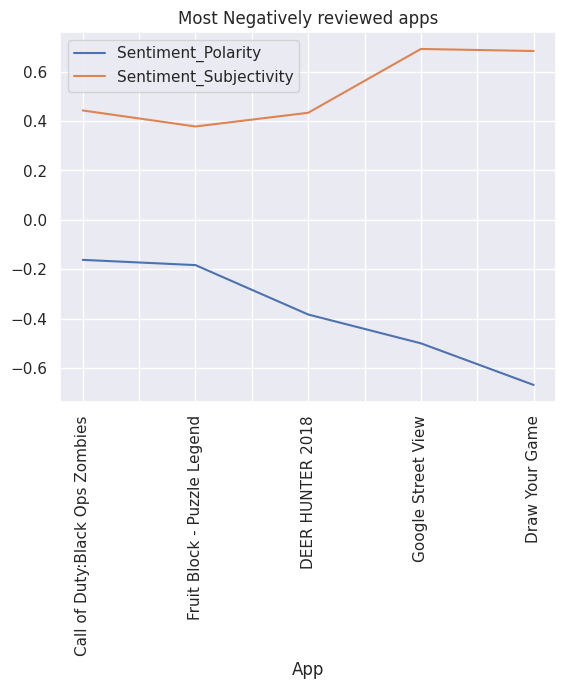

In [ ]:
most_negatively_reviewed_apps.plot()
plt.xticks(rotation=90)
plt.title('Most Negatively reviewed apps')
plt.show()

In [ ]:
df2=data.mean()[(data.mean()['Sentiment_Polarity']==0) & (data.mean()['Sentiment_Subjectivity']==0)]

In [ ]:
df2

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
CBS News,0.0,0.0
HD Camera,0.0,0.0
